<a href="https://colab.research.google.com/github/Novice1414/Final_Year_Project/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes_DataSet.csv')

In [ ]:
diabetes_df = diabetes_df.rename(columns={'Diabetes Outcome': 'DO'})

In [ ]:
diabetes_df.head(20)

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),DO
0,6,50,148,72,35,0,33.6,0.627,No,No,Yes,1,1,1
1,1,31,85,66,29,0,26.6,0.351,No,Yes,No,1,0,0
2,8,32,183,64,0,0,23.3,0.672,Yes,No,No,0,1,1
3,1,21,89,66,23,94,28.1,0.167,Yes,No,No,0,0,0
4,0,33,137,40,35,168,43.1,2.288,Yes,Yes,Yes,0,1,1
5,5,30,116,74,0,0,25.6,0.201,Yes,Yes,Yes,1,1,0
6,3,26,78,50,32,88,31.0,0.248,Yes,No,No,1,0,1
7,10,29,115,0,0,0,35.3,0.134,No,Yes,No,1,1,0
8,2,53,197,70,45,543,30.5,0.158,Yes,No,Yes,1,1,1
9,8,54,125,96,0,0,0.0,0.232,Yes,Yes,No,0,0,1


In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Age                         0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Polyphagia                  0
Visual Blurring             0
Obesity                     0
Smoker                      0
High Cholestrol (HDL)       0
DO                          0
dtype: int64

In [ ]:
diabetes_df['Polyphagia'] = diabetes_df['Polyphagia'].replace({'Yes': 1, 'No': 0})
diabetes_df['Visual Blurring'] = diabetes_df['Visual Blurring'].replace({'Yes': 1, 'No': 0})
diabetes_df['Obesity'] = diabetes_df['Obesity'].replace({'Yes': 1, 'No': 0})

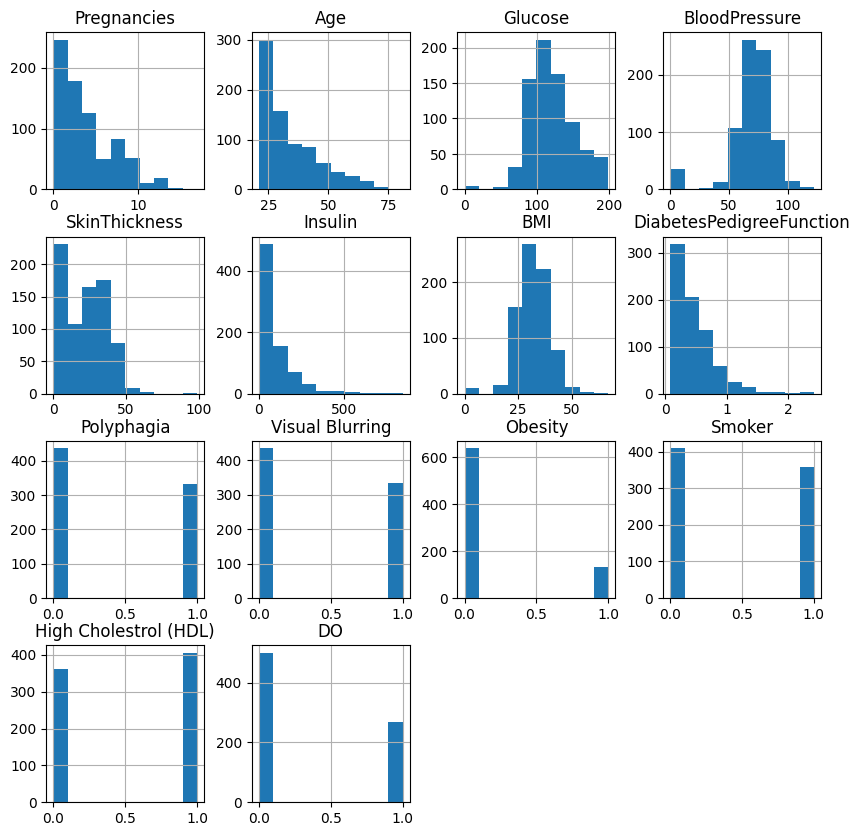

In [ ]:
diabetes_df.hist(figsize=(10, 10))
plt.show()

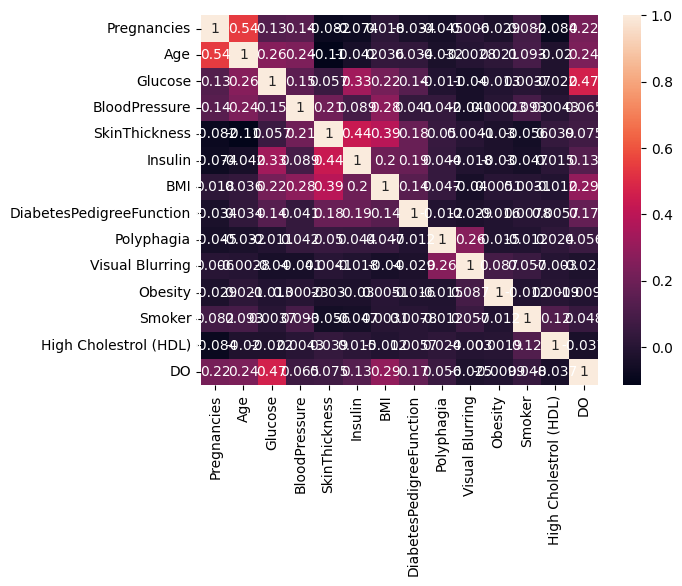

In [ ]:
sns.heatmap(diabetes_df.corr(), annot=True)
plt.show()

In [ ]:
diabetes_df = diabetes_df.dropna()

** Checking that which columns have higher outliers**

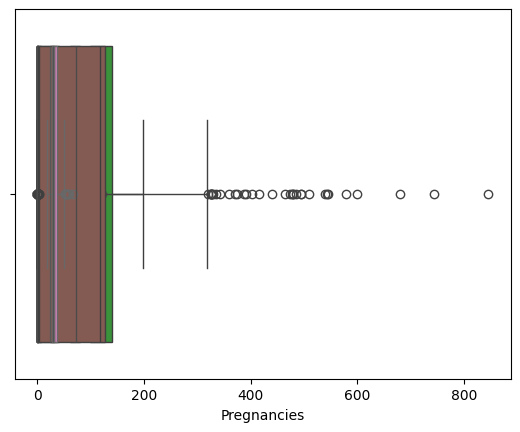

In [ ]:
import seaborn as sns

# Create a boxplot for each column
for col in diabetes_df.columns:
    sns.boxplot(x=diabetes_df[col])

**Printing the columns having higher outliers**

In [ ]:
# Calculate the interquartile range for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Count the number of outliers for each column
num_outliers = ((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).sum()

In [ ]:
# Sort columns by number of outliers
sorted_cols = num_outliers.sort_values(ascending=False)

# Print columns with most outliers
print(sorted_cols.head())

Obesity                     130
BloodPressure                45
Insulin                      34
DiabetesPedigreeFunction     29
BMI                          19
dtype: int64


**Removing the outliers**

In [ ]:
import numpy as np

# Calculate IQR for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Determine which values are outliers
outliers = ((diabetes_df < (Q1 - threshold * IQR)) | (diabetes_df > (Q3 + threshold * IQR)))

# Remove rows containing outliers
clean_df = diabetes_df[~outliers.any(axis=1)]

**Splitting the train and test data from the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('DO', axis=1)
y = diabetes_df['DO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Applying ANN**

In [ ]:
import tensorflow as tf


In [ ]:
ann = tf.keras.models.Sequential()

**Adding the input layers and hidden layers**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))

**Output Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

**Training the ANN on training Set**

In [ ]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])



Accuracy: 0.9136807918548584


![dnnwithdropout.jpeg](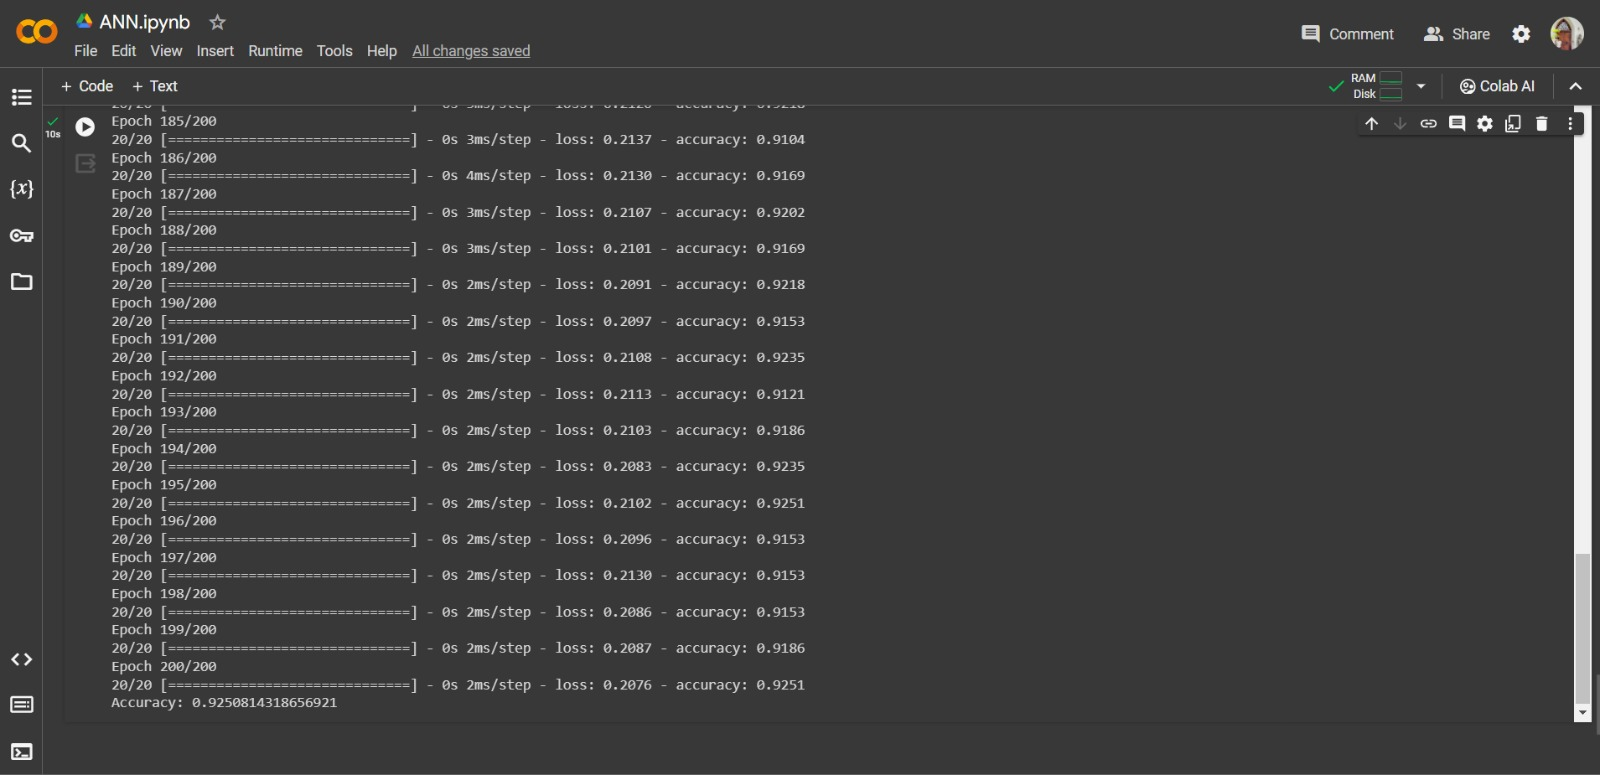![earlystopping.jpeg](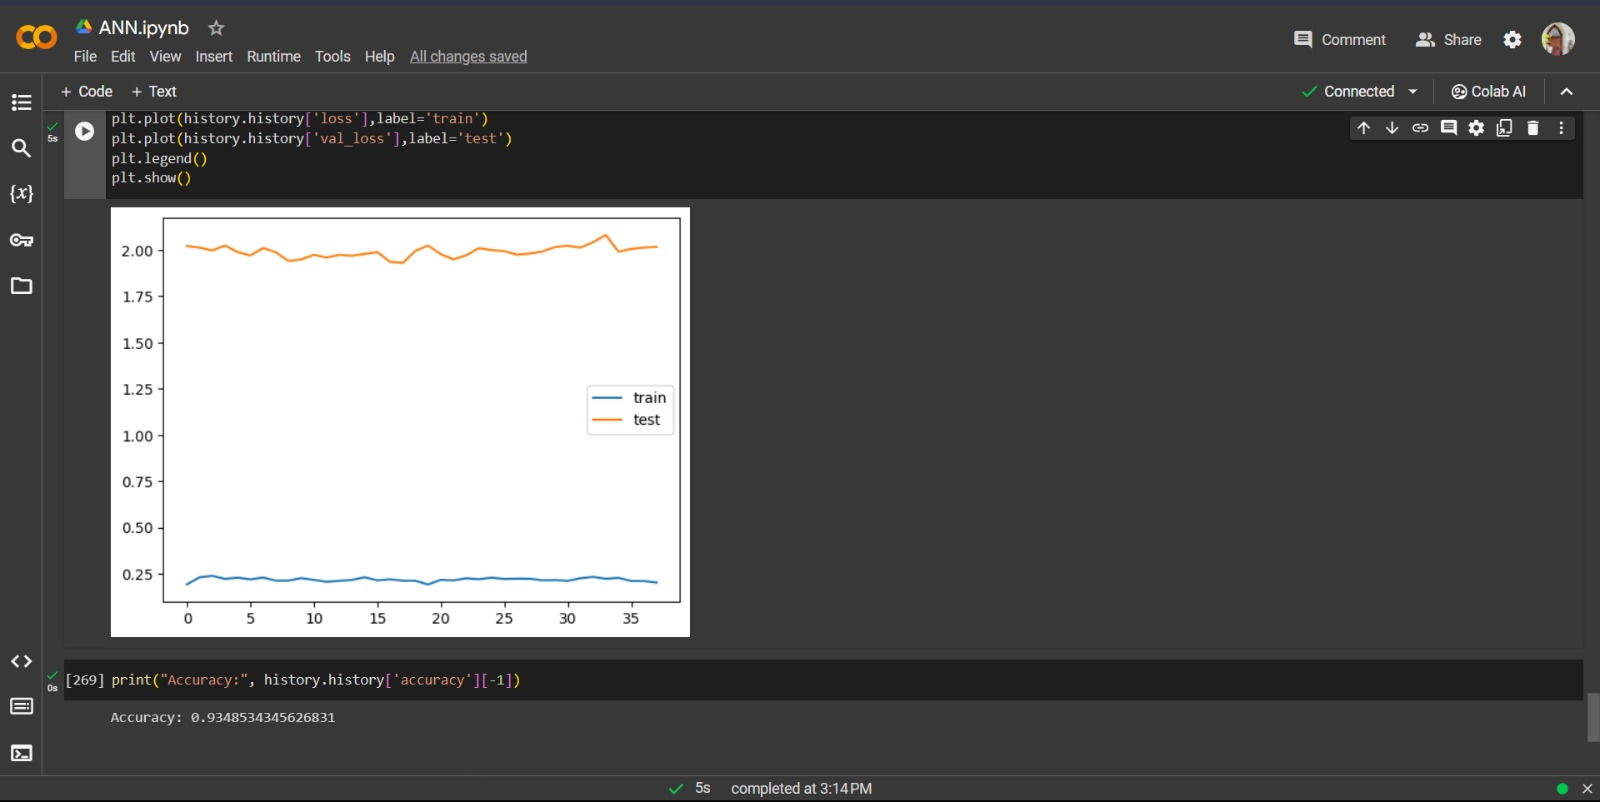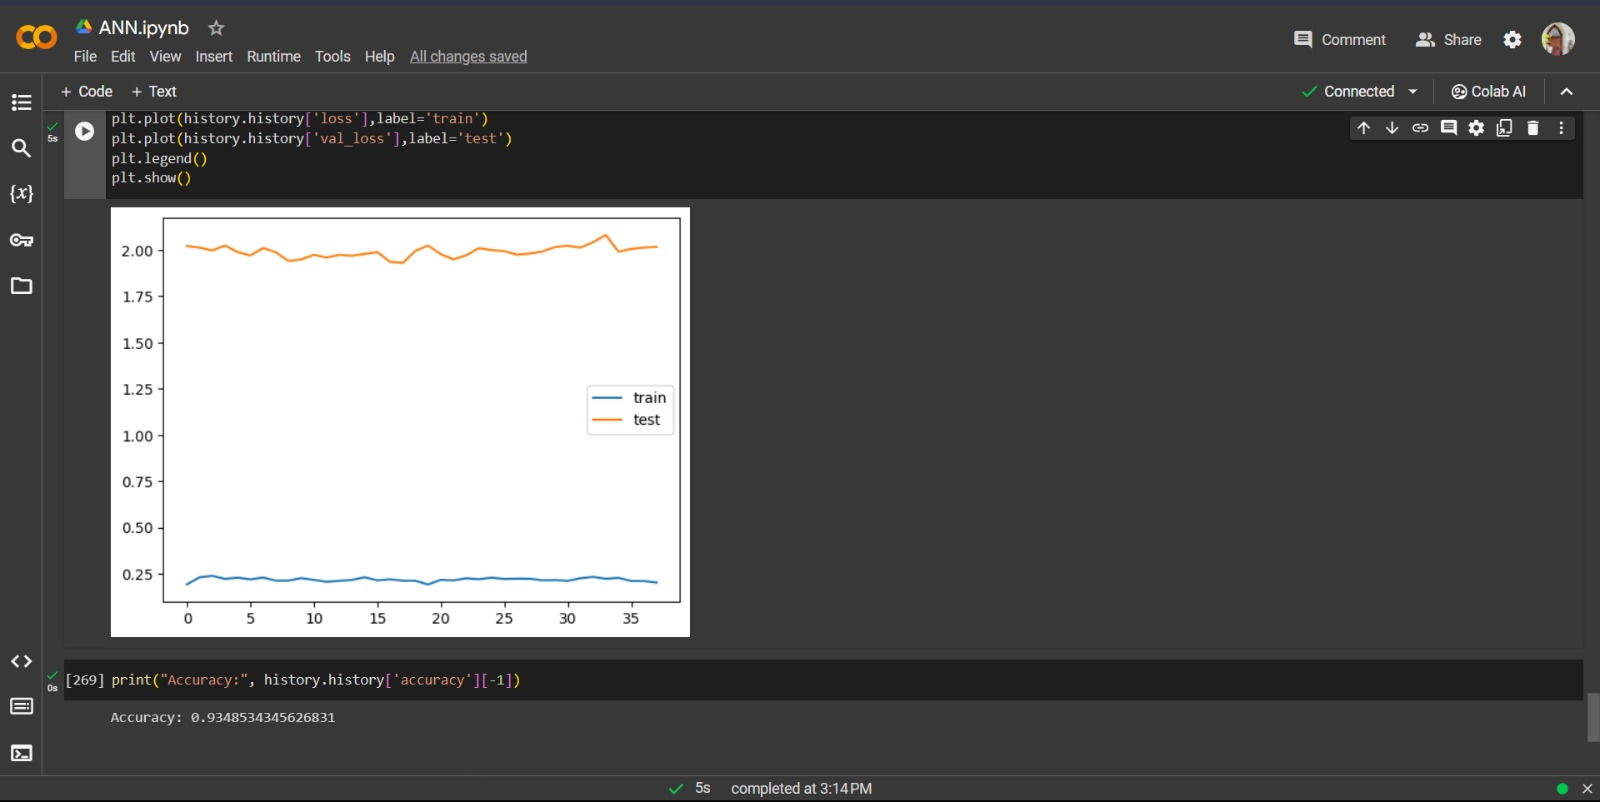))

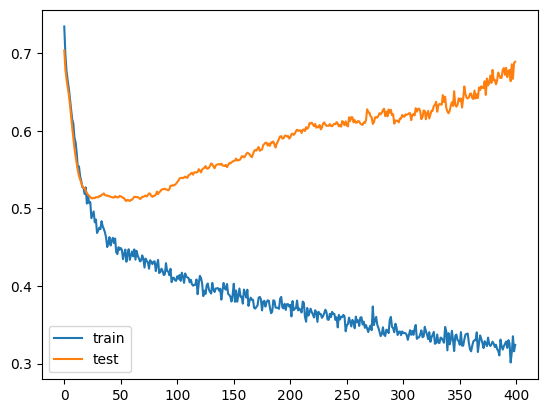

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

**Hyperparameter Tuning**

Early Stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.00001,patience=20,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [ ]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200, callbacks=callback)


Epoch 1/200
20/20 [==============================] - 0s 6ms/step - loss: 0.1951 - accuracy: 0.9153 - val_loss: 14.4039 - val_accuracy: 0.6753
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1749 - accuracy: 0.9283 - val_loss: 14.4266 - val_accuracy: 0.6753
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1715 - accuracy: 0.9316 - val_loss: 14.1547 - val_accuracy: 0.6688
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9169 - val_loss: 14.4809 - val_accuracy: 0.6818
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.1831 - accuracy: 0.9202 - val_loss: 14.1808 - val_accuracy: 0.6688
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9235 - val_loss: 13.8748 - val_accuracy: 0.6753
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9202 - val_loss: 14.2416 - val_accuracy: 0.6753
Epoch 

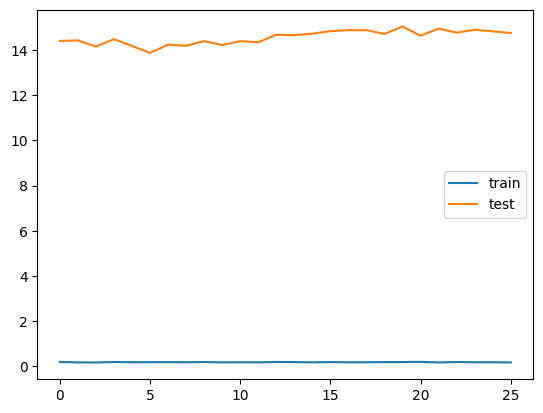

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9283387660980225


**Regularization**

L1 regularization

In [ ]:
ann2 = tf.keras.models.Sequential()


ann2.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))

In [ ]:
ann2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann2.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = ann2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=1800,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9495114088058472


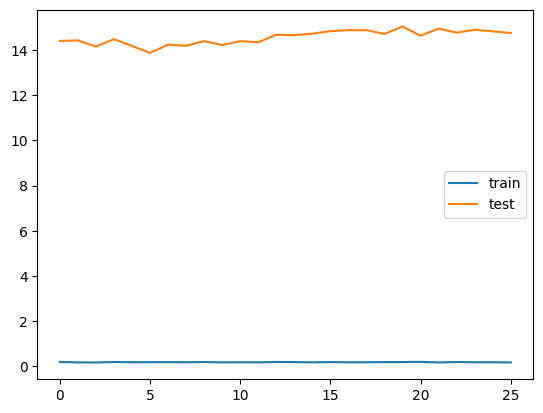

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

L2 Regularization

In [ ]:
ann3 = tf.keras.models.Sequential()


ann3.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [ ]:
ann3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann3.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = ann3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=2600,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9495114088058472


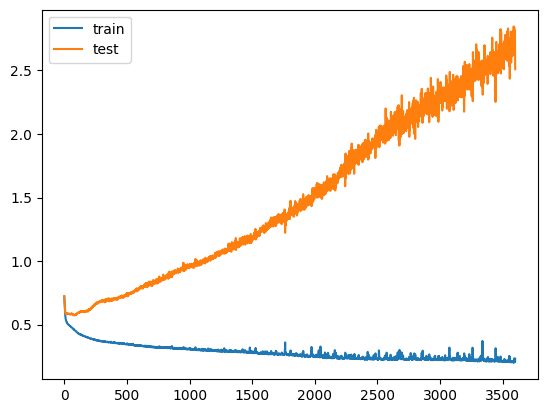

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

**Performance Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
y_pred = ann3.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

In [ ]:
y_test_classes = y_test.values.astype(int)

Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Precision
precision = precision_score(y_test_classes, y_pred_classes)
print("Precision:", precision)

# Recall
recall = recall_score(y_test_classes, y_pred_classes)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test_classes, y_pred_classes)
print("F1 Score:", f1)